In [64]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os

In [44]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/GUVICLASS/TSLA.csv")

In [45]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [46]:
df['Date'].min()

'2010-06-29'

In [47]:
df['Date'].max()

'2020-02-03'

In [48]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


#Data Preprocessing

In [93]:
df['Date'] = pd.to_datetime(df['Date'])

In [75]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [78]:
df = df.drop_duplicates()

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.3 KB


In [80]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2416,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,2015-04-15 11:09:56.026490112,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-11-19 18:00:00,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,2015-04-16 12:00:00,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,2017-09-07 06:00:00,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,2020-02-03 00:00:00,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07
std,NaN,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06


In [81]:
data = df[['Close']]

In [94]:
df.set_index('Date', inplace=True)

# Exploratory Data Analysis (EDA)

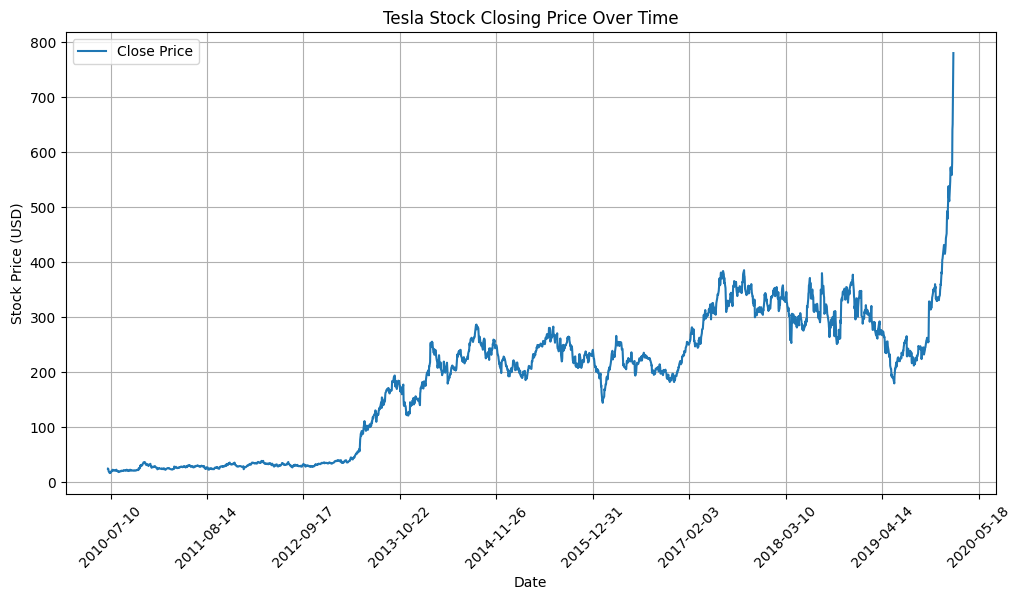

In [97]:
# Plot the 'Close' price over time
plt.figure(figsize=(12, 6))  # Increase figure size
plt.plot(df['Close'], label='Close Price')
plt.title('Tesla Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.grid(True)

# Adjust x-axis ticks to show fewer dates
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Show only 10 dates on x-axis

plt.legend()
plt.show()



*   Tesla’s stock price remained relatively stable from 2010 to 2012, staying below $50.

*  A significant upward trend began in 2013, with increasing volatility and multiple price surges through 2019.
*   In early 2020, the stock price spiked dramatically, reaching nearly $800, indicating a major growth phase and strong investor confidence.


/tmp/ipython-input-98-2626645332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rolling_30'] = data['Close'].rolling(window=30).mean()


<Axes: title={'center': '30-Day Rolling Average'}>

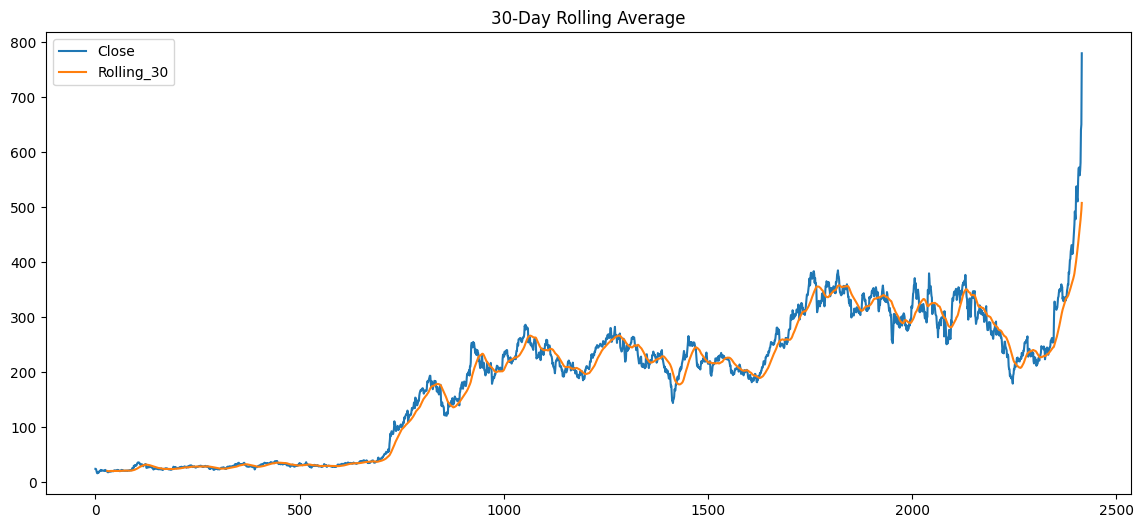

In [98]:
data['Rolling_30'] = data['Close'].rolling(window=30).mean()
data[['Close', 'Rolling_30']].plot(figsize=(14, 6), title='30-Day Rolling Average')



*   The blue line represents Tesla’s actual daily closing prices, which show frequent short-term fluctuations.
*   The orange line is the 30-day rolling average, which smooths out short-term noise and highlights the overall trend.
*   This plot helps visualize long-term growth and patterns more clearly, showing strong upward movement, especially toward the end.



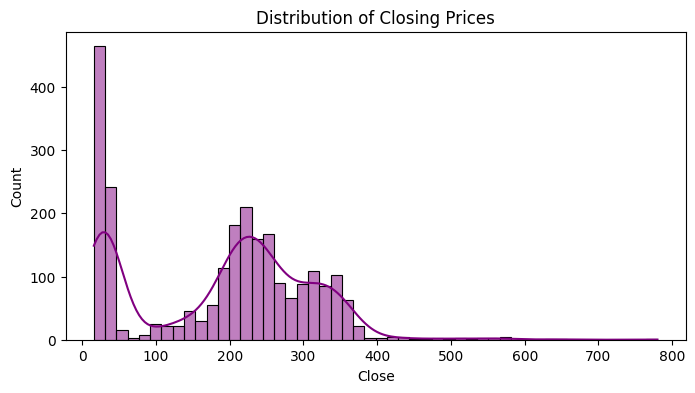

In [99]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Close'], bins=50, kde=True, color='purple')
plt.title('Distribution of Closing Prices')
plt.show()


*   Shows the full range of Tesla closing prices, including very high values (up to $800).
*   Because of these extreme values (outliers), most of the distribution looks compressed on the left.


# Removing the outliers.

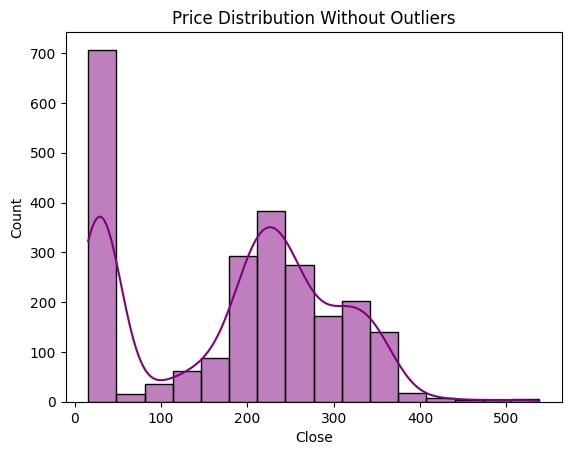

In [100]:
from scipy.stats import zscore

# Compute z-scores
z_scores = zscore(df['Close'])

# Filter
filtered_df = df[(np.abs(z_scores) < 3)]  # keep z-score < 3

# Plot
sns.histplot(filtered_df['Close'], kde=True ,color='purple')
plt.title('Price Distribution Without Outliers')
plt.show()


*   The extreme high prices have been removed, likely using a technique like IQR filtering or setting a price cap (e.g., below $550).
*   As a result, the distribution becomes more balanced and readable, especially in the $0–$400 range.


We have removed the outliers.

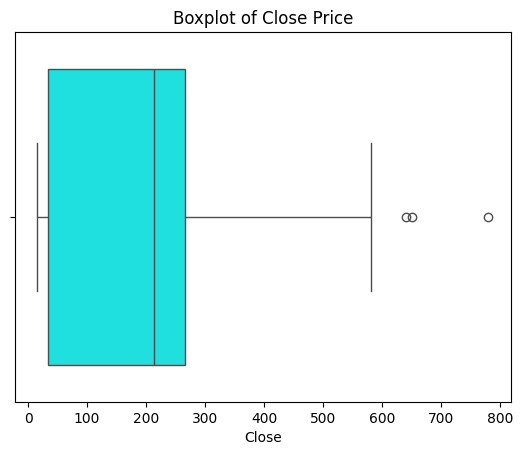

In [101]:
sns.boxplot(x=df['Close'], color='cyan')
plt.title("Boxplot of Close Price")
plt.show()



*   Most closing prices lie between approximately $50 and $600, with a median around $200.
*   A few outliers (dots beyond the whiskers) exist above $600, indicating rare but extreme price spikes.



# Removing the outliers

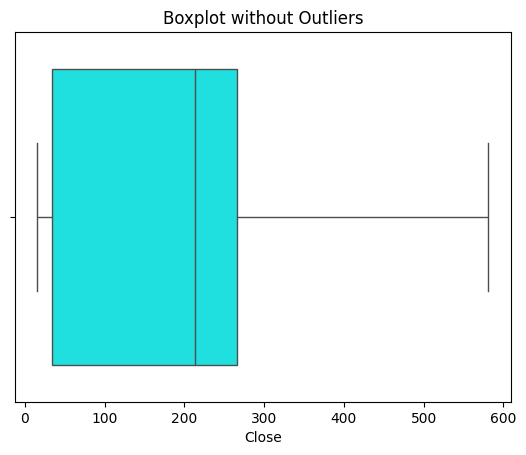

In [102]:
# Compute IQR
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1

# Set bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
filtered_df = df[(df['Close'] >= lower_bound) & (df['Close'] <= upper_bound)]

# Plot boxplot without outliers
sns.boxplot(x=filtered_df['Close'], color='cyan')
plt.title('Boxplot without Outliers')
plt.show()

We have succesfully removed the outliers

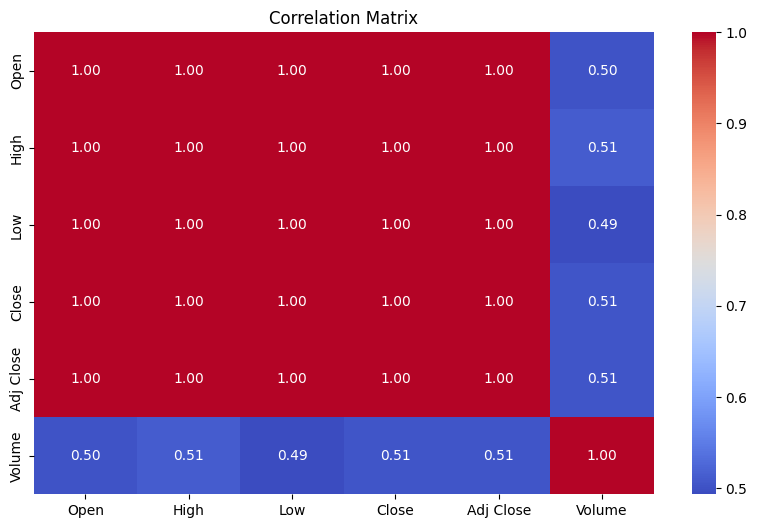

In [103]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


*   Open, High, Low, Close, and Adj Close are perfectly correlated (1.00) — indicating they move together almost identically.
*   Volume has a moderate correlation (~0.5) with the price-related features, suggesting some relationship, but not strong.

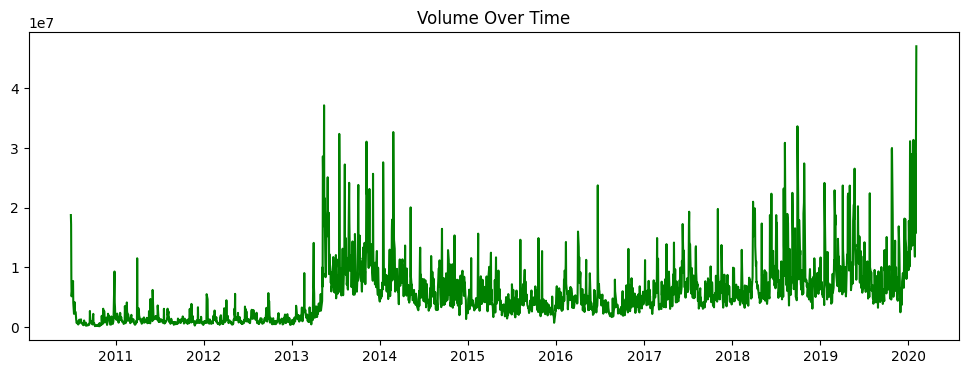

In [105]:
plt.figure(figsize=(12, 4))
plt.plot(df['Volume'], color='green')
plt.title('Volume Over Time')
plt.show()



*   Tesla’s trading volume was relatively low and stable from 2010 to 2012, indicating limited market activity.
*   A noticeable spike in volume starts around 2013, likely driven by growing investor interest and company developments.
*   From 2018 to 2020, trading volume becomes much more volatile and active, peaking sharply in 2020 — reflecting heightened public interest and market momentum.

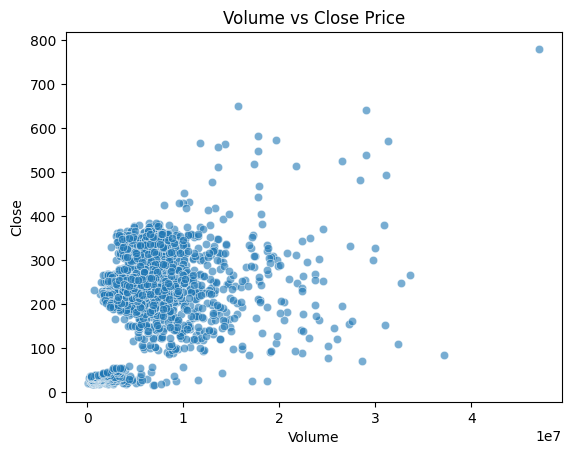

In [106]:
sns.scatterplot(x='Volume', y='Close', data=df, alpha=0.6)
plt.title('Volume vs Close Price')
plt.show()



*   There is no strong linear relationship between volume and closing price — points are widely scattered.
*   Most values are concentrated around low volumes (<10 million) and closing prices between $100–$300.

*   A few outliers show high prices or volumes, but they don’t follow a consistent pattern.


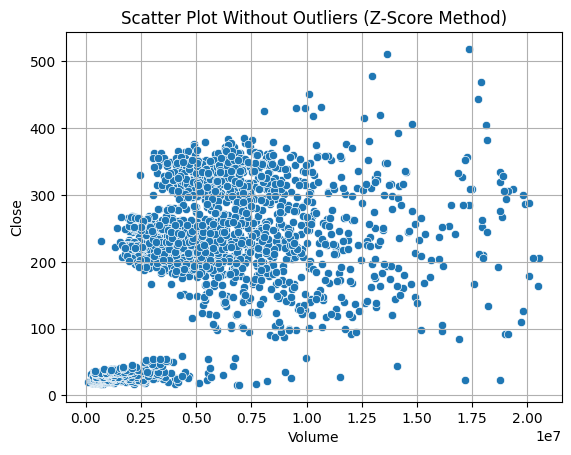

In [107]:
# Compute z-scores for selected columns
df_z = df[['Close', 'Volume']].copy()
z_scores = np.abs(zscore(df_z))

# Filter: keep only rows where all z-scores are < 3
filtered_df = df[(z_scores < 3).all(axis=1)]

# Scatter plot after removing outliers
sns.scatterplot(x=filtered_df['Volume'], y=filtered_df['Close'])
plt.title('Scatter Plot Without Outliers (Z-Score Method)')
plt.xlabel('Volume')
plt.ylabel('Close')
plt.grid(True)
plt.show()

Succesfully removed the outliers

#Feature Engineering - Sequence Creation

In [108]:
# Preprocessing
close_data = df[['Close']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_data)

In [109]:
# Create shared input sequences
def create_shared_dataset(data, seq_len, forecast_horizons):
    X = []
    y_dict = {h: [] for h in forecast_horizons}
    for i in range(seq_len, len(data) - max(forecast_horizons)):
        X.append(data[i - seq_len:i])
        for h in forecast_horizons:
            y_dict[h].append(data[i + h - 1])  # Predict the h-th next day
    X = np.array(X)
    y_dict = {h: np.array(y_dict[h]) for h in forecast_horizons}
    return X, y_dict

In [110]:
# Setup
seq_len = 60
forecast_horizons = [1, 5, 10]
X, y_dict = create_shared_dataset(scaled_data, seq_len, forecast_horizons)


In [111]:
# Split train/test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train_dict = {h: y[:split] for h, y in y_dict.items()}
y_test_dict = {h: y[split:] for h, y in y_dict.items()}


In [112]:
# Train and evaluate
results_lstm = {}
results_rnn = {}

In [113]:
def train_lstm(X_train, y_train):
    model = Sequential([
        LSTM(64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stop], verbose=0)
    return model

In [114]:
def train_rnn(X_train, y_train):
    model = Sequential([
        SimpleRNN(64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stop], verbose=0)
    return model

In [129]:
# Train LSTM and RNN for each horizon
for h in forecast_horizons:
    # LSTM
    lstm_model = train_lstm(X_train, y_train_dict[h])
    lstm_pred = lstm_model.predict(X_test)
    lstm_pred_rescaled = scaler.inverse_transform(lstm_pred)
    lstm_actual_rescaled = scaler.inverse_transform(y_test_dict[h])
    lstm_mse = mean_squared_error(lstm_actual_rescaled, lstm_pred_rescaled)

    results_lstm[h] = {
        "model": lstm_model,
        "pred": lstm_pred_rescaled,
        "actual": lstm_actual_rescaled,
        "mse": lstm_mse
    }

    # RNN
    rnn_model = train_rnn(X_train, y_train_dict[h])
    rnn_pred = rnn_model.predict(X_test)
    rnn_pred_rescaled = scaler.inverse_transform(rnn_pred)
    rnn_actual_rescaled = scaler.inverse_transform(y_test_dict[h])
    rnn_mse = mean_squared_error(rnn_actual_rescaled, rnn_pred_rescaled)

    results_rnn[h] = {
        "model": rnn_model,
        "pred": rnn_pred_rescaled,
        "actual": rnn_actual_rescaled,
        "mse": rnn_mse
    }

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


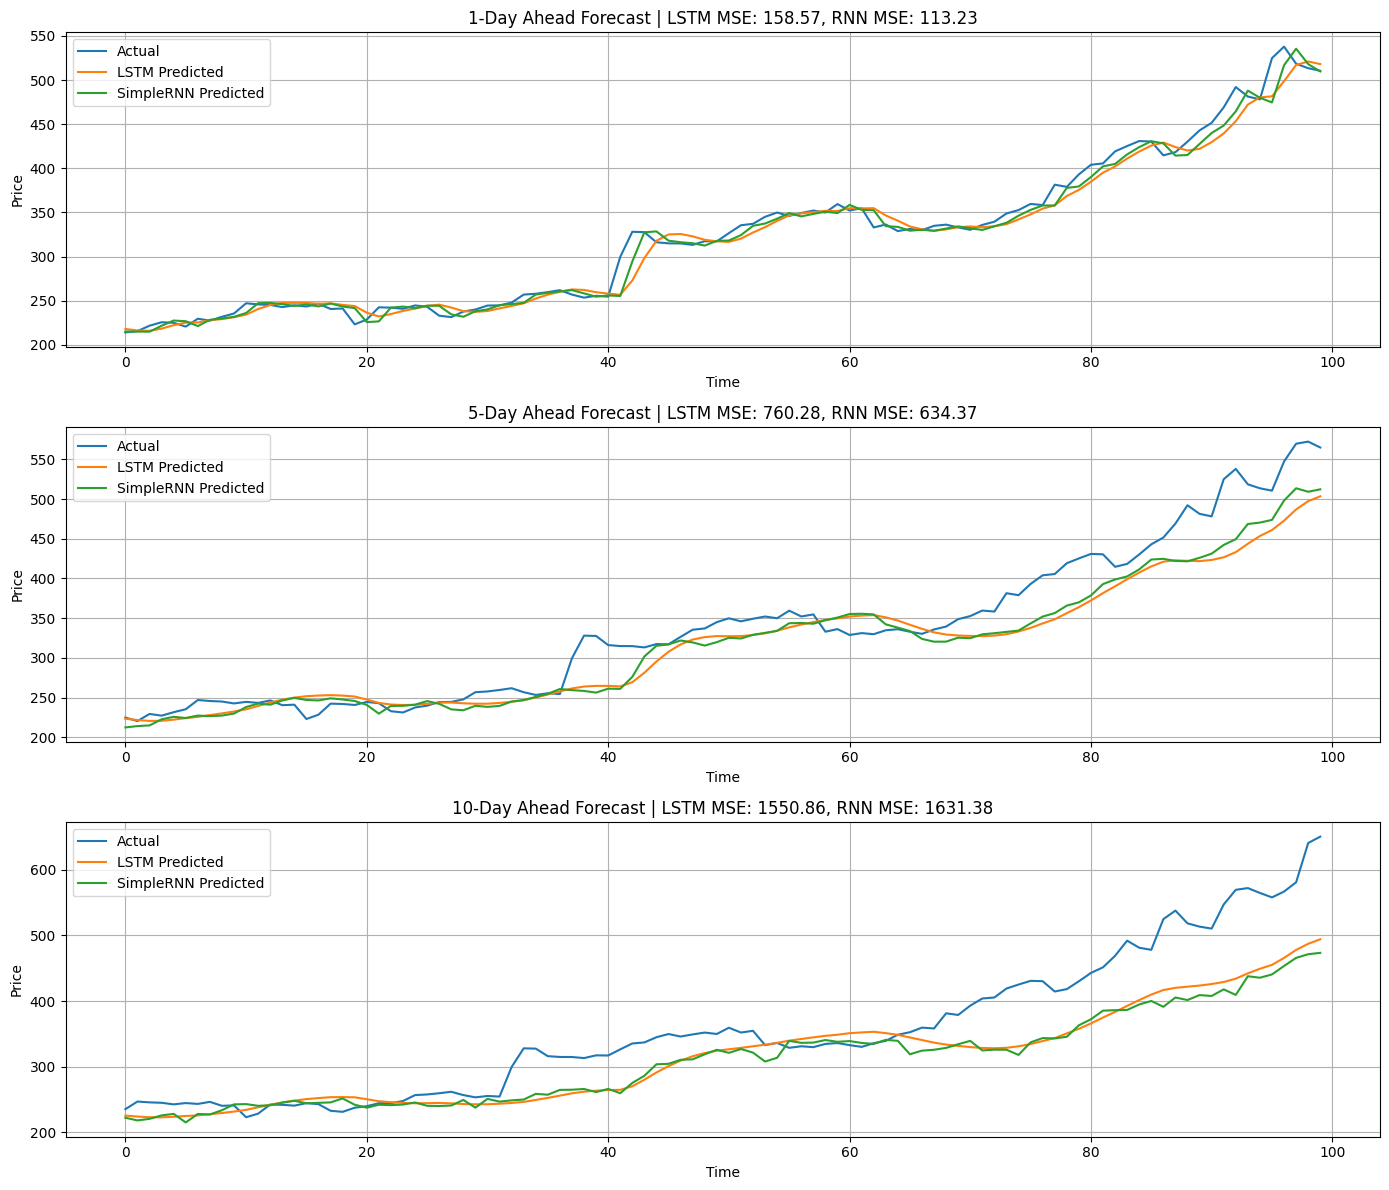

In [130]:
# Plot all forecasts
plt.figure(figsize=(14, 12))
for idx, h in enumerate(forecast_horizons):
    plt.subplot(3, 1, idx + 1)
    plt.plot(results_lstm[h]['actual'][-100:], label='Actual')
    plt.plot(results_lstm[h]['pred'][-100:], label='LSTM Predicted')
    plt.plot(results_rnn[h]['pred'][-100:], label='SimpleRNN Predicted')
    plt.title(f"{h}-Day Ahead Forecast | LSTM MSE: {results_lstm[h]['mse']:.2f}, RNN MSE: {results_rnn[h]['mse']:.2f}")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [131]:
# Print summary
print("\nModel MSE Summary:\n")
for h in forecast_horizons:
    print(f"{h}-Day Forecast:")
    print(f"  LSTM MSE     : {results_lstm[h]['mse']:.4f}")
    print(f"  SimpleRNN MSE: {results_rnn[h]['mse']:.4f}\n")


Model MSE Summary:

1-Day Forecast:
  LSTM MSE     : 158.5664
  SimpleRNN MSE: 113.2254

5-Day Forecast:
  LSTM MSE     : 760.2799
  SimpleRNN MSE: 634.3712

10-Day Forecast:
  LSTM MSE     : 1550.8553
  SimpleRNN MSE: 1631.3805



**1-Day & 5-Day Forecasts**
SimpleRNN performs better — likely due to the simplicity of short-term memory patterns.

The task may not require long-term dependency capture, which is where LSTM usually shines.

**10-Day Forecast**

LSTM wins — as expected, LSTM outperforms SimpleRNN when longer-term dependencies matter.

SimpleRNN struggles due to vanishing gradient issues over longer sequences.